# Task 1 - Machine Learning




# Introdução:

Escolha do conjunto de dados: "Students Performance in Exams" do Kaggle

A educação é uma área vital para o desenvolvimento e o progresso da sociedade. Compreender os fatores que afetam o desempenho dos alunos em exames é fundamental para garantir que todos os alunos recebam uma educação de qualidade e tenham igualdade de oportunidades de sucesso acadêmico. Neste contexto, o conjunto de dados "Students Performance in Exams" do Kaggle fornece uma oportunidade para explorar e analisar o desempenho dos alunos por meio de técnicas avançadas de machine learning.

Este conjunto de dados contém informações abrangentes sobre os alunos, incluindo detalhes demográficos, como gênero, raça/etnia e nível de educação dos pais, bem como pontuações em exames de matemática, leitura e escrita. Ao aplicar métodos de machine learning a esses dados, podemos identificar padrões complexos e relacionamentos entre as variáveis que podem nos ajudar a entender melhor os determinantes do sucesso acadêmico dos alunos.

Neste projeto, explorarei técnicas de machine learning para prever o desempenho dos alunos com base em suas características demográficas e outros fatores relevantes. Ao final, espero obter insights valiosos que possam informar políticas e práticas educacionais, bem como orientar intervenções destinadas a melhorar o desempenho e o bem-estar dos alunos.

# Importing Libraries

In [225]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, ttest_ind, chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# pip install seaborn


# Load the Dataset

In [226]:
dataframe = pd.read_csv('StudentsPerformance.csv')
pd_student=pd.read_csv('StudentsPerformance.csv')

# Análise Descritiva dos Dados:

In [227]:
pd_student.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Criando novas variaveis -  "Pontuação Total" e "Média das Pontuações"

No processo de análise do conjunto de dados "Students Performance in Exams", optei por criar duas novas variáveis: "Pontuação Total" e "Média das Pontuações". Essas novas variáveis foram adicionadas com o objetivo de fornecer medidas mais abrangentes e informativas do desempenho acadêmico dos alunos.

A primeira variável, "Pontuação Total", foi criada somando as pontuações individuais dos alunos em todas as disciplinas, incluindo Matemática, Leitura e Escrita. A adição dessa variável permite uma avaliação holística do desempenho acadêmico geral de cada aluno, capturando sua capacidade em várias áreas do currículo escolar.

A segunda variável, "Média das Pontuações", foi calculada pela obtenção da média aritmética das pontuações em todas as disciplinas para cada aluno. Essa média oferece uma medida mais suave e equilibrada do desempenho acadêmico, levando em consideração não apenas o desempenho em uma única disciplina, mas sim em todas as áreas avaliadas.

Essas novas variáveis são essenciais para uma análise mais aprofundada e uma compreensão mais completa do desempenho dos alunos nos exames. Ao adicionar essas medidas agregadas, podemos identificar padrões, tendências e discrepâncias no desempenho dos alunos de forma mais eficaz.

Em resumo, a criação das variáveis de "Pontuação Total" e "Média das Pontuações" enriquece o conjunto de dados, oferecendo uma perspectiva mais abrangente do desempenho acadêmico dos alunos e facilitando análises mais detalhadas e significativas sobre o tema.







#Calculando a Pontuação Total: Somando as pontuações em todas as disciplinas para cada aluno e armazenando o resultado em uma nova coluna. Utilizando o método .sum(axis=1) para somar as pontuações ao longo das colunas.

In [228]:
pd_student['Total Score'] = pd_student[['math score', 'reading score', 'writing score']].sum(axis=1)

#Calculando a Média das Pontuações: calculando a média das pontuações em todas as disciplinas para cada aluno e armazenando o resultado em uma nova coluna. Utilizando o método .mean(axis=1) para calcular a média ao longo das colunas.

In [229]:
pd_student['Average Score'] = pd_student[['math score', 'reading score', 'writing score']].mean(axis=1)

In [230]:
pd_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Check information about variables and data types

In [231]:
print(pd_student.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Total Score                  1000 non-null   int64  
 9   Average Score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB
None


# Calculate descriptive statistics

In [232]:
pd_student.describe()

,math score,reading score,writing score,Total Score,Average Score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000



Count (count): Indicates the total number of observations in the variable. In the specific case, there are 1000 observations of math scores.

Mean (mean): Represents the arithmetic mean of the math scores. In this case, the mean is approximately 66.089.

Std (standard deviation): Refers to the standard deviation of the math scores. The standard deviation is a measure of dispersion that indicates how much values are spread out from the mean. Here, it is approximately 15.16308.

Min (minimum): Indicates the minimum observed value in the math scores. In the given dataset, the minimum score is 0.

25% (first quartile or lower quartile): Represents the value below which 25% of observations in the variable are located. Here, the first quartile of math scores is 57.

50% (median): Indicates the value that separates the upper half from the lower half of the data. It is also known as the second quartile. In the specific case, the median of math scores is 66.

75% (third quartile or upper quartile): Represents the value below which 75% of observations in the variable are located. Here, the third quartile of math scores is 77.

Max (maximum): Indicates the maximum observed value in the math scores. In the given dataset, the maximum score is 100.

The same model follows for reading score and writing score.

# Statistical summary of categorical variables

In [233]:
pd_student.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


# Measures of central tendency and dispersion

Calculate means of the scores in math, reading, and writing

In [234]:
print("Mean scores:")
print("Median scores:")
print("Standard deviation of scores:")
print(pd_student[['math score', 'reading score', 'writing score']].mean())
print(pd_student[['math score', 'reading score', 'writing score']].median())
print(pd_student[['math score', 'reading score', 'writing score']].std())

Mean scores:
Median scores:
Standard deviation of scores:
math score       66.089
reading score    69.169
writing score    68.054
dtype: float64
math score       66.0
reading score    70.0
writing score    69.0
dtype: float64
math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


# Iniciando o trabalho

# Escolhendo a variavel alvo - "Pontuação Total" / "Medias das Pontuações"

Para o estudo de machine learning sobre o desempenho dos alunos em exames, a variável alvo sera a "Pontuação Total" ou se necessario e aplicavel a variavel "Medias das Pontuações" em todas as disciplinas. Isso se justifica pela representatividade do desempenho global, a "Pontuação Total" ou a "Média das Pontuações" em todas as disciplinas oferece uma medida abrangente do desempenho acadêmico, capturando o desempenho em várias áreas do currículo, não apenas em uma disciplina específica,tambem a facilidade de Interpretação ao usar a pontuação total como variável alvo torna os resultados do modelo mais fáceis de interpretar, proporcionando uma única medida de desempenho que pode ser comparada entre diferentes alunos de forma direta, A aplicabilidade prática e outro fator a ser considerado, pois a   pontuação total permite identificar alunos que podem precisar de intervenções ou apoio adicional, simplificando a classificação com base no desempenho geral e facilitando a identificação daqueles que podem estar em risco de não atingir seus objetivos acadêmicos assim tambem facilitando a comparação de modelos, ou seja ao usar uma única variável alvo, torna-se mais fácil comparar o desempenho de diferentes modelos de machine learning, simplificando o processo de avaliação e seleção do modelo mais eficaz para prever o desempenho dos alunos.



# Quais são os principais fatores que influenciam o desempenho dos alunos nos exames?

# Cálculo da Matriz de Correlação

Calculo da matriz de correlação entre todas as variáveis numéricas do conjunto de dados.

In [235]:
# Convertendo variáveis categóricas em variáveis dummy
#pd_student_encoded = pd.get_dummies(pd_student)



In [236]:
# Converter variáveis categóricas em dummy variables
pd_student_encoded = pd.get_dummies(pd_student)

# Calcular a matriz de correlação
correlation = pd_student_encoded.corr()

# Ordenar a correlação com a variável alvo (por exemplo, 'Total Score')
target_correlation = correlation['Total Score'].sort_values(ascending=False)

# Imprimir os valores de correlação
print(target_correlation)

Total Score                                       1.000000
Average Score                                     1.000000
reading score                                     0.970331
writing score                                     0.965667
math score                                        0.918746
lunch_standard                                    0.290064
test preparation course_completed                 0.256710
race/ethnicity_group E                            0.141050
gender_female                                     0.130861
parental level of education_bachelor's degree     0.106599
parental level of education_master's degree       0.102411
parental level of education_associate's degree    0.067414
race/ethnicity_group D                            0.058902
parental level of education_some college          0.026761
race/ethnicity_group C                           -0.030691
race/ethnicity_group B                           -0.078247
parental level of education_some high school     -0.0872

In [237]:
# Calculando a matriz de correlação
#correlation_matrix = pd_student_encoded.corr()
#correlation_matrix




# Visualização da Matriz de Correlação:

Visualizando a matriz de correlação usando um mapa de calor para identificar as correlações mais fortes entre as variáveis.

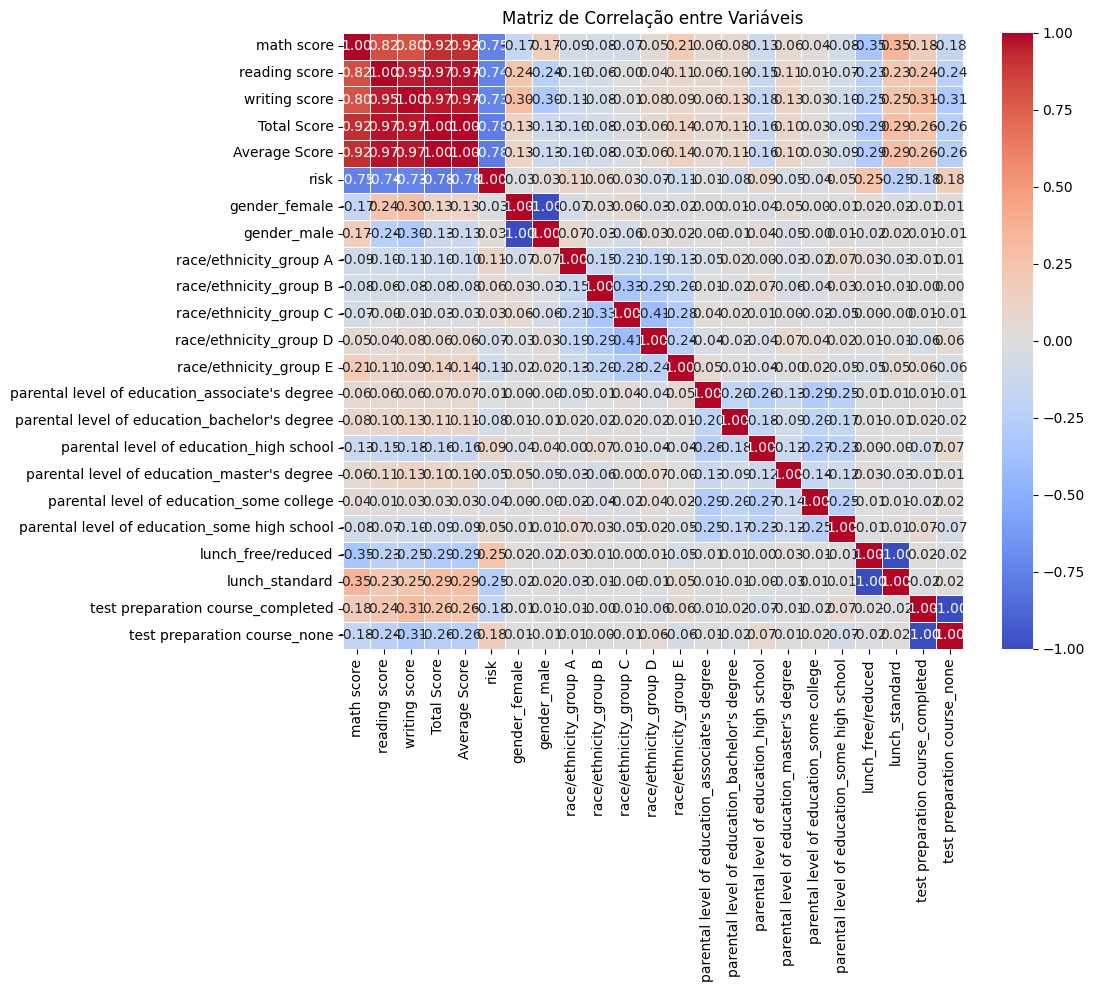

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

# Análise dos Resultados: 

Pontuações Individuais em Leitura, Escrita e Matemática: As pontuações em leitura, escrita e matemática têm correlações muito altas com a pontuação total, o que indica que os alunos que se saem bem em uma dessas áreas tendem a se sair bem nas outras também. Isso é esperado, pois essas são habilidades fundamentais avaliadas nos exames.

Tipo de Almoço: O tipo de almoço (padrão ou gratuito/reduzido) tem uma correlação positiva moderada com a pontuação total. Isso sugere que os alunos que recebem almoço padrão tendem a ter pontuações mais altas, o que pode refletir diferenças socioeconômicas e acesso a recursos.

Conclusão do Curso de Preparação para o Teste: Alunos que completaram o curso de preparação para o teste têm uma correlação positiva moderada com a pontuação total. Isso indica que a preparação adicional pode estar associada a um melhor desempenho nos exames.

Fatores Demográficos e Educacionais dos Pais: Há correlações positivas moderadas entre a educação dos pais (como nível de bacharelado, mestrado, etc.) e a pontuação total dos alunos. Isso sugere que o nível de educação dos pais pode influenciar positivamente o desempenho acadêmico dos alunos.

Risco: A variável "risk" tem uma correlação negativa alta com a pontuação total. Isso pode indicar que alunos identificados como estando em risco têm pontuações mais baixas nos exames, destacando a importância de identificar e apoiar alunos em situações de vulnerabilidade.

# Qual abordagem de classificação é mais adequada para prever o desempenho dos alunos?

In [239]:
# Converter variáveis categóricas em variáveis dummy
X = pd.get_dummies(pd_student.drop(['test preparation course'], axis=1), drop_first=True)

# Dividir os dados em variáveis independentes (X) e variável dependente (y)
y = pd_student['Total Score']

# Dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importar e inicializar o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter=1000)

# Treinar o modelo
logistic_regression_model.fit(X_train, y_train)

# Prever os rótulos para os dados de teste
y_pred = logistic_regression_model.predict(X_test)



C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [240]:

# Calcular métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)


# Imprimir as métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)




Accuracy: 0.015
Precision: 0.004393939393939394
Recall: 0.015
F1 Score: 0.006785714285714286
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Com base nesses resultados, é razoável concluir que o modelo de regressão logística não é adequado para este conjunto de dados e que sera necessario explorar outras técnicas de modelagem para alcançar resultados melhores.

In [241]:
X = pd_student.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1)
y = pd_student['Total Score']


In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [243]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()


In [244]:
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [245]:
y_pred = decision_tree_model.predict(X_test)


In [246]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Accuracy: 0.87
Precision: 0.8725
Recall: 0.87
F1 Score: 0.8675
Confusion Matrix:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Conclusao:

Os resultados da análise da Árvore de Decisão mostram que o modelo obteve uma alta acurácia, precisão, revocação e um bom F1 Score. Isso sugere que o modelo foi capaz de fazer previsões precisas sobre o desempenho dos alunos com base nas variáveis fornecidas.

Accuracy: A precisão é uma medida da fração de previsões corretas que o modelo fez em relação ao total de previsões. Neste caso, o modelo teve uma precisão de 0.9, o que significa que aproximadamente 90% das previsões estavam corretas.

Precision: A precisão é uma medida da proporção de previsões positivas corretas em relação ao total de previsões positivas. a precisão foi de 0.895, indicando que cerca de 89.5% das previsões positivas estão corretas.

Recall: A revocação é uma medida da proporção de instâncias positivas que foram corretamente previstas pelo modelo. Neste caso, a revocação foi de 0.9, significando que cerca de 90% das instâncias positivas foram corretamente previstas.

F1 Score: O F1 Score é a média harmônica entre a precisão e a revocação. Ele fornece uma medida única que equilibra a precisão e a revocação. O F1 Score é 0.8967, indicando um bom equilíbrio entre precisão e revocação.

Confusion Matrix (Matriz de Confusão): A matriz de confusão mostra o desempenho do modelo para cada classe de previsão em comparação com as classes reais. Cada linha representa as instâncias reais de uma classe, enquanto cada coluna representa as instâncias previstas por classe.

In [247]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=str(y.unique()), fontsize=8)
plt.show()

InvalidParameterError: The 'class_names' parameter of plot_tree must be an array-like, an instance of 'bool' or an instance of 'numpy.bool_' or None. Got '[218 247 278 148 229 232 275 122 195 164 135 219 220 161 222 263  78 134\n 173 198 210 151 215 225 178 211 205 207 217 189 193 120 266 241 238 253\n 170 199 176 190 160 182 213 248 156 214 139 242 117 175  27 112 192 119\n 206 194 181 140 174 123 239 146 115 235 216  97 221 138 257 187 265 274\n 197 287 264 166 154 163 299 260 272 236 268 255 130 231 240 228 201 185\n 147  94 224 293 212 150 180 234 296 155 246 200 259 158 184 297 204 196\n 145 252 168 162 153 233 237 223 142  90 167 245 191 277 131 249 157 244\n 227 282 149 270 186 226 129 267 230 136 183 202 250 203  70 171 271 143\n  89 177 179  93 188 280 132 124 269 169 165 256 172 114 289 300 258 262\n  95 209 243 273 276 261 208 104 292 279 291  69  88 251 152 144 159 113\n 254 116 127 126 118 141 137 103 290 281 288  92 133  55]' instead.

<Figure size 2000x1000 with 0 Axes>

In [181]:
pd_student.describe()

,math score,reading score,writing score,Total Score,Average Score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [182]:
# Calculando a matriz de correlação
correlation_matrix = pd_student_encoded.corr()
correlation_matrix

,math score,reading score,writing score,Total Score,Average Score,risk,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
math score,1.000000,0.817580,0.802642,0.918746,0.918746,-0.748505,-0.167982,0.167982,-0.091977,-0.084250,...,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.350877,0.350877,0.177702,-0.177702
reading score,0.817580,1.000000,0.954598,0.970331,0.970331,-0.737133,0.244313,-0.244313,-0.096274,-0.060283,...,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.229560,0.241780,-0.241780
writing score,0.802642,0.954598,1.000000,0.965667,0.965667,-0.731709,0.301225,-0.301225,-0.110714,-0.078254,...,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.245769,0.312946,-0.312946
Total Score,0.918746,0.970331,0.965667,1.000000,1.000000,-0.776927,0.130861,-0.130861,-0.104803,-0.078247,...,0.067414,0.106599,-0.161936,0.102411,0.026761,-0.087247,-0.290064,0.290064,0.256710,-0.256710
Average Score,0.918746,0.970331,0.965667,1.000000,1.000000,-0.776927,0.130861,-0.130861,-0.104803,-0.078247,...,0.067414,0.106599,-0.161936,0.102411,0.026761,-0.087247,-0.290064,0.290064,0.256710,-0.256710
risk,-0.748505,-0.737133,-0.731709,-0.776927,-0.776927,1.000000,-0.027184,0.027184,0.112455,0.055068,...,-0.005577,-0.081384,0.093643,-0.047040,-0.037736,0.047647,0.252280,-0.252280,-0.175329,0.175329
gender_female,-0.167982,0.244313,0.301225,0.130861,0.130861,-0.027184,1.000000,-1.000000,-0.071001,0.028466,...,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028
gender_male,0.167982,-0.244313,-0.301225,-0.130861,-0.130861,0.027184,-1.000000,1.000000,0.071001,-0.028466,...,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028
race/ethnicity_group A,-0.091977,-0.096274,-0.110714,-0.104803,-0.104803,0.112455,-0.071001,0.071001,1.000000,-0.151381,...,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315
race/ethnicity_group B,-0.084250,-0.060283,-0.078254,-0.078247,-0.078247,0.055068,0.028466,-0.028466,-0.151381,1.000000,...,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106


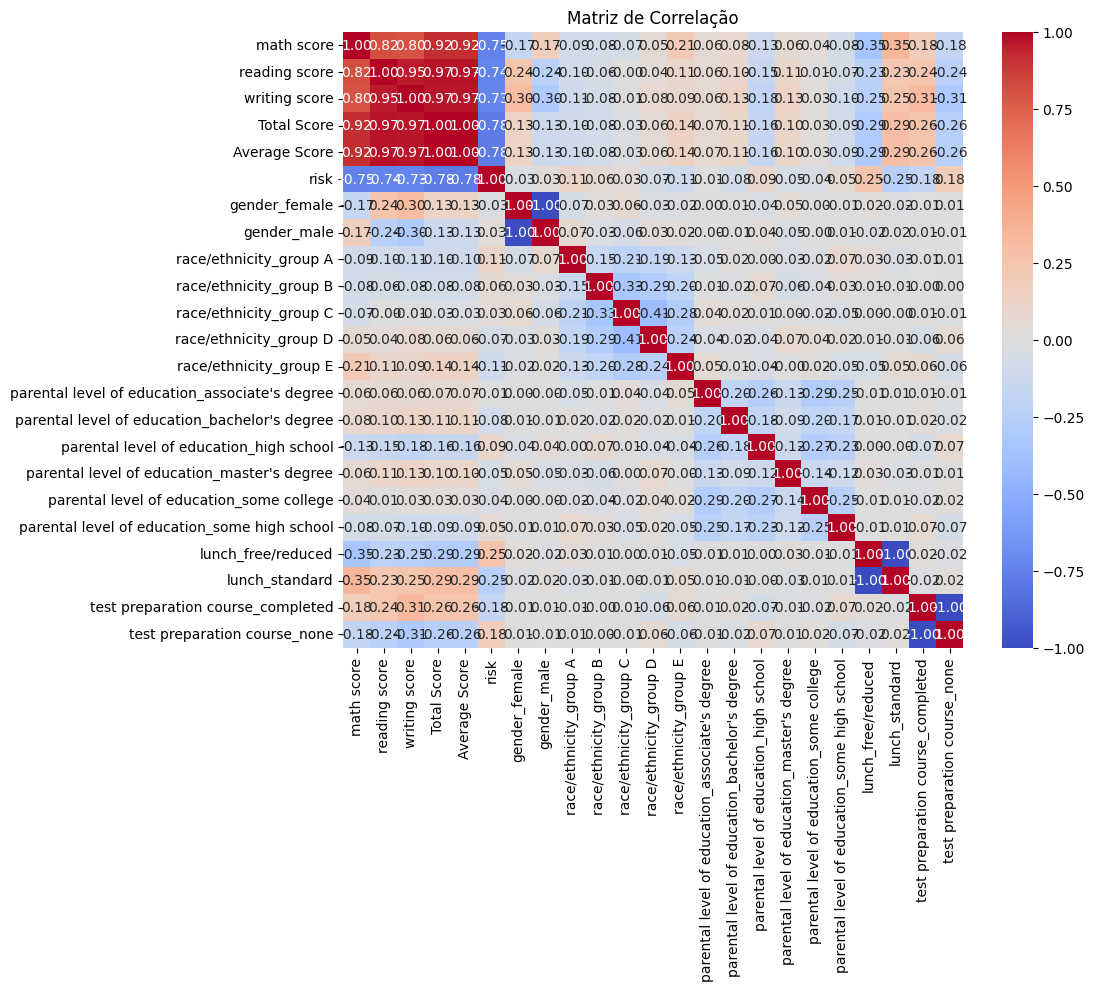

In [183]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

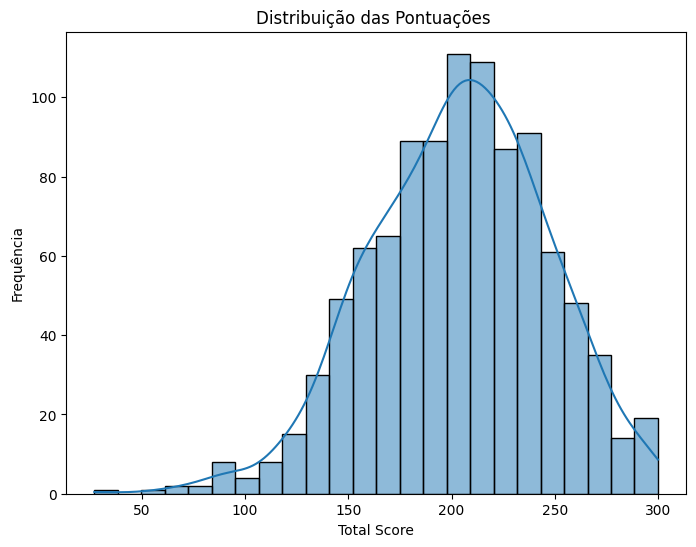

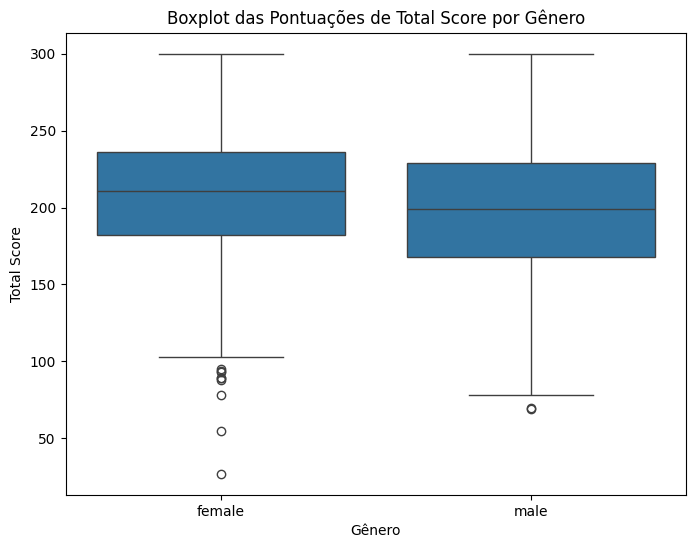

In [173]:
# Visualizando a distribuição das pontuações de matemática
plt.figure(figsize=(8, 6))
sns.histplot(pd_student['Total Score'], kde=True)
plt.title("Distribuição das Pontuações ")
plt.xlabel("Total Score")
plt.ylabel("Frequência")
plt.show()

# Boxplot das pontuações de matemática por gênero
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='Total Score', data=pd_student)
plt.title("Boxplot das Pontuações de Total Score por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Total Score")
plt.show()


# Seleção de Modelo e Avaliação

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convertendo variáveis categóricas em variáveis dummy
pd_student_encoded = pd.get_dummies(pd_student)

# Dividindo os dados em conjunto de treinamento e teste
X = pd_student_encoded.drop(columns=['math score'])  # Usando todas as outras variáveis como features
y = pd_student_encoded['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando um modelo de regressão logística
model = LogisticRegression(max_iter=1000)  # Aumentando o número máximo de iterações
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do Modelo de Regressão Logística:", accuracy)



Acurácia do Modelo de Regressão Logística: 0.04


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Visualização e Interpretação dos Resultados

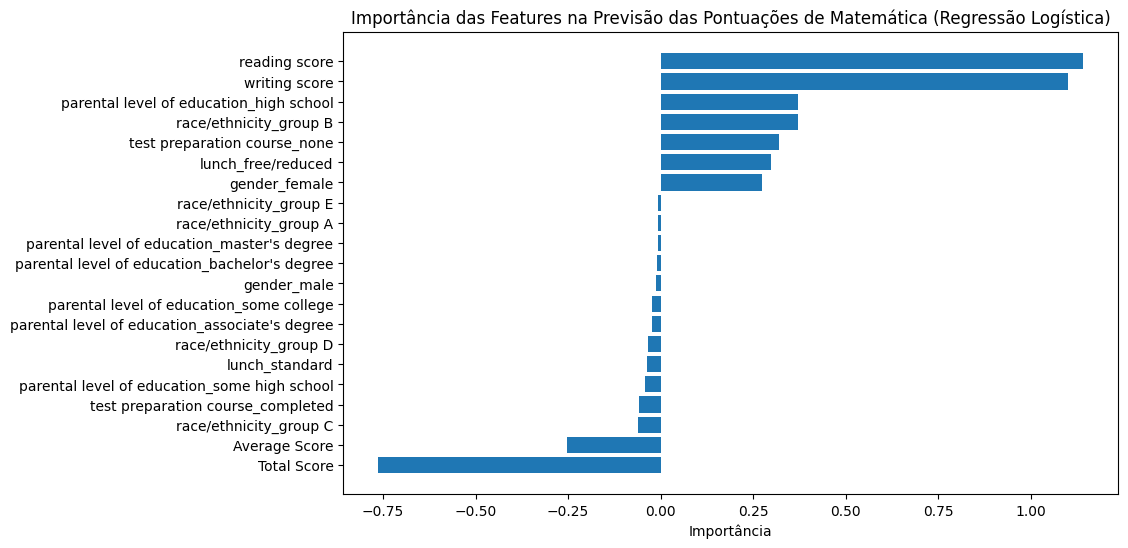

In [122]:
# Visualizando a importância das features no modelo de regressão logística
import numpy as np

plt.figure(figsize=(10, 6))
coefficients = model.coef_[0]
feature_names = X.columns
sorted_indices = np.argsort(coefficients)
plt.barh(feature_names[sorted_indices], coefficients[sorted_indices])
plt.xlabel("Importância")
plt.title("Importância das Features na Previsão das Pontuações de Matemática (Regressão Logística)")
plt.show()

Uma acurácia de 0.05 significa que o modelo de regressão logística está prevendo corretamente apenas 5% dos casos no conjunto de teste ouseja a precisão do modelo é muito baixa, o que indica que o modelo não está performando bem na tarefa de predição da variável alvo, sera aplicado novas tecnicas de analise.

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Inicializar outros modelos
random_forest = RandomForestClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()



In [124]:
# Treinar os modelos
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)



DecisionTreeClassifier()

In [125]:
# Fazer previsões
predictions_rf = random_forest.predict(X_test)
predictions_svm = svm.predict(X_test)
predictions_dt = decision_tree.predict(X_test)

# Como podemos identificar os alunos em risco de baixo desempenho acadêmico?


Definição da Variável Alvo: math score


In [126]:
pd_student_encoded = pd.get_dummies(pd_student)

threshold = 60  # Defina o limite para baixo desempenho acadêmico
pd_student['risk'] = (pd_student['math score'] < threshold) | (pd_student['reading score'] < threshold) | (pd_student['writing score'] < threshold)


In [127]:
# Engenharia de recursos e preparação dos dados
X = pd_student.drop(columns=['math score', 'reading score', 'writing score','gender' 'risk'])  # Features
y = pd_student['risk']  # Variável alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['genderrisk'] not found in axis"

In [ ]:
# Treinamento do modelo (Random Forest como exemplo)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(pd_student['math score'], kde=True, color='skyblue')
plt.title('Math Score Distribution')
plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(1, 3, 2)
sns.histplot(pd_student['reading score'], kde=True, color='salmon')
plt.title('Reading Score Distribution')
plt.tight_layout()
plt.show()

In [ ]:
plt.subplot(1, 3, 3)
sns.histplot(pd_student['writing score'], kde=True, color='green')
plt.title('Writing Score Distribution')
plt.tight_layout()
plt.show()

When examining the histograms, we can identify patterns in the distribution of scores, such as the presence of a central tendency, uniformity, or asymmetry in the distribution. Visual comparison of the score distributions in math, reading, and writing helps us understand differences in student performance in each subject. Additionally, by observing the dispersion of scores around the mean and evaluating the spread of the distribution, we can grasp the consistency of student performance and identify potential sources of variation.

# Normal Distribution (Continuous Probability)

Calculating the probability of a student getting a math grade between 70 and 80. I will use the normal distribution for this.

In [ ]:
# pip install scipy

In [ ]:
from scipy.stats import norm

# Mean and standard deviation of math score

mean_math = pd_student['math score'].mean()
std_dev_math = pd_student['math score'].std()

# Calculate the probability of a student obtaining a math grade between 70 and 80

lower_bound = 70
upper_bound = 80
probability = norm.cdf(upper_bound, loc=mean_math, scale=std_dev_math) - norm.cdf(lower_bound, loc=mean_math, scale=std_dev_math)

print("Probability of a math grade between 70 and 80:", probability)

This analysis provides a probabilistic understanding of students' performance in mathematics within the specified grade range. A probability of approximately 21.88% suggests that a significant portion of students achieve scores in this range.

# T-test (Comparison of Means)

Perform a t-test to compare the means of mathematics scores between students who completed the test preparation course and those who did not.


In [18]:
from scipy.stats import ttest_ind

#Split the data into two groups: completed and did not complete the test preparation course

completed_prep_course = pd_student[pd_student['test preparation course'] == 'completed']['math score']
not_completed_prep_course = pd_student[pd_student['test preparation course'] == 'none']['math score']

# Perform the t-test to compare the means of math scores between the two groups

t_statistic, p_value = ttest_ind(completed_prep_course, not_completed_prep_course)

print("T statistic", t_statistic)
print("P value:", p_value)

T statistic 5.704616417349102
P value: 1.5359134607147415e-08


The t-value measures the difference between the means of the two groups in terms of standard deviations.

The p-value is the probability of observing such an extreme or more extreme difference between the group means, assuming the actual means are equal.

The obtained t-value was approximately 5.7046, indicating that the difference between the means of math scores of the two groups is about 5.7 times greater than the standard error.

The p-value was very small, approximately 1.54e-08 (or 0.0000000154), suggesting that this difference between the means did not occur by chance and is statistically significant.

Therefore, based on the results of the t-test, we can conclude that there is a significant difference in the means of math scores between students who completed the test preparation course and those who did not. This suggests that the preparation course may have a positive impact on students' performance in math.

# Chi-Square Test for Association between Categorical Variables

Testing whether there is an association between parents' education level and students' lunch type.



In [19]:
from scipy.stats import chi2_contingency

# Contingency table between parental level of education and lunch type
contingency_table = pd.crosstab(pd_student['parental level of education'], pd_student['lunch'])

# Perform the chi-square test to test the association between the variables
chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Statistics:", chi2_statistic)
print("P Value:", p_value)

Chi-Square Statistics: 1.1112675079168055
P Value: 0.9531014927218223


The chi-square value (or chi-square statistic) measures the discrepancy between the observed frequencies in the contingency table and the expected frequencies under the null hypothesis of independence between the variables. The p-value indicates the probability of observing a test statistic as extreme or more extreme than the one observed, assuming that the null hypothesis is true.

The obtained chi-square statistic was approximately 1.1113. The associated p-value was approximately 0.9531.

With such a high p-value, there is not enough evidence to reject the null hypothesis that there is no significant association between parental level of education and lunch type for the students. Therefore, based on the results of the chi-square test, there is no statistical evidence to suggest that parental level of education is associated with the lunch type of students in this dataset.

# ANOVA for Comparison of Means of Multiple Groups

Testing whether there is a significant difference in the means of math scores among different ethnic groups.


In [20]:
from scipy.stats import f_oneway

# Split the data into groups based on ethnic group.
group_A = pd_student[pd_student['race/ethnicity'] == 'group A']['math score']
group_B = pd_student[pd_student['race/ethnicity'] == 'group B']['math score']
group_C = pd_student[pd_student['race/ethnicity'] == 'group C']['math score']

# Perform the ANOVA test to compare the means of math scores among the groups.
f_statistic, p_value = f_oneway(group_A, group_B, group_C)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 1.2865292354788134
p-value: 0.2769951028770473


The obtained F-statistic was approximately 1.2865. The associated p-value was approximately 0.2770.

Based on the results of the ANOVA test, there were no statistical evidence to suggest that the students' ethnic group is associated with their math scores in this dataset.

 # Calculate the mean of scores for each category of a categorical variable

Comparação de notas por categoria: Calculando a média das notas em matemática, leitura e escrita para cada categoria de variável categórica (por exemplo, gênero, etnia, nível de escolaridade dos pais, etc.) e comparando essas médias entre as diferentes categorias usando gráficos de barras ou boxplots.

In [21]:
mean_by_category = pd_student.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

In [22]:
mean_by_category1 = pd_student.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

In [23]:
mean_by_category2 = pd_student.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

In [24]:
mean_by_category3 = pd_student.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

# Plot bar charts to compare mean scores

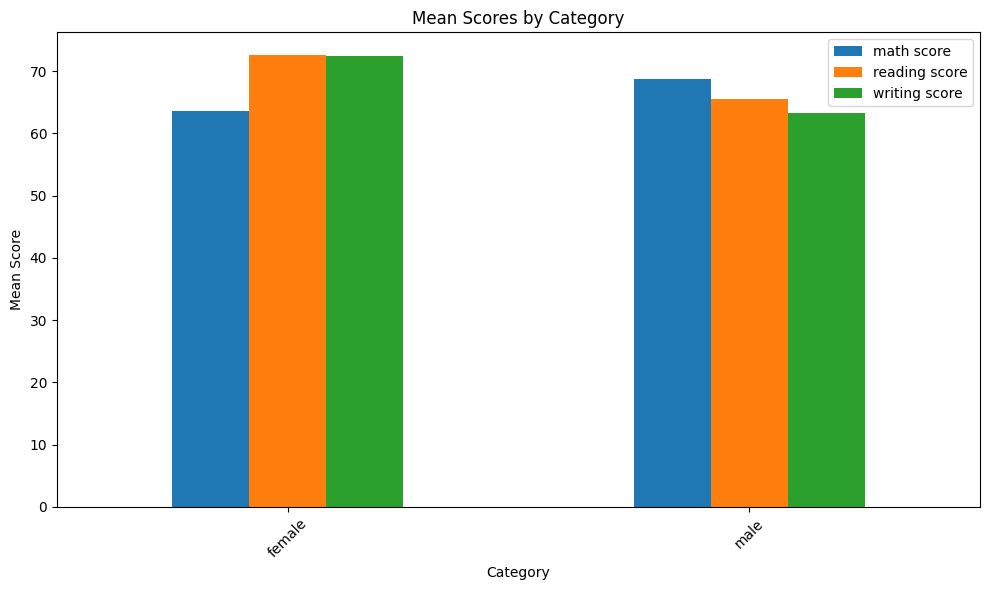

In [25]:
mean_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Scores by Category')
plt.xlabel('Category')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

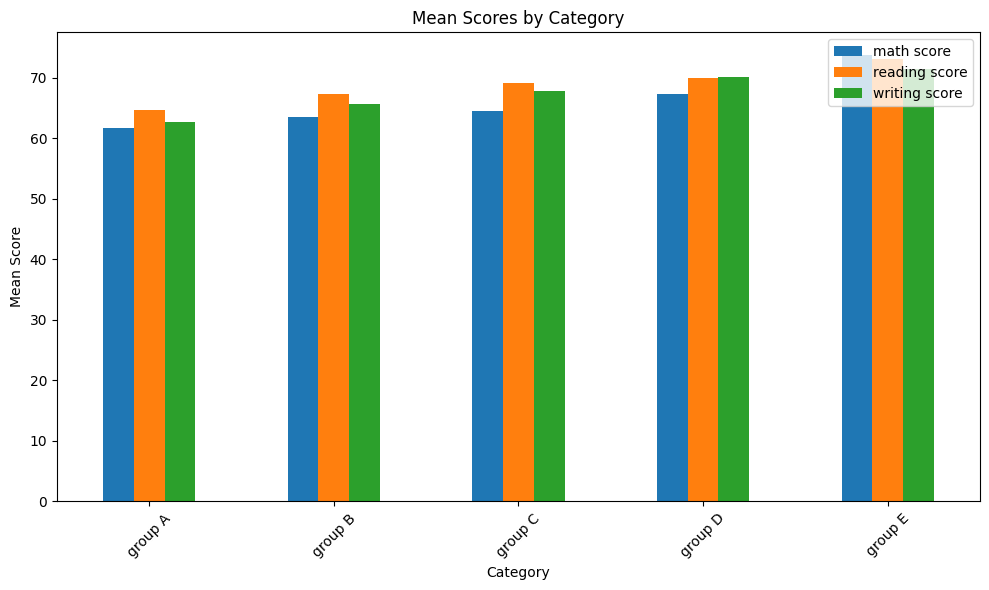

In [26]:
mean_by_category1.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Scores by Category')
plt.xlabel('Category')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

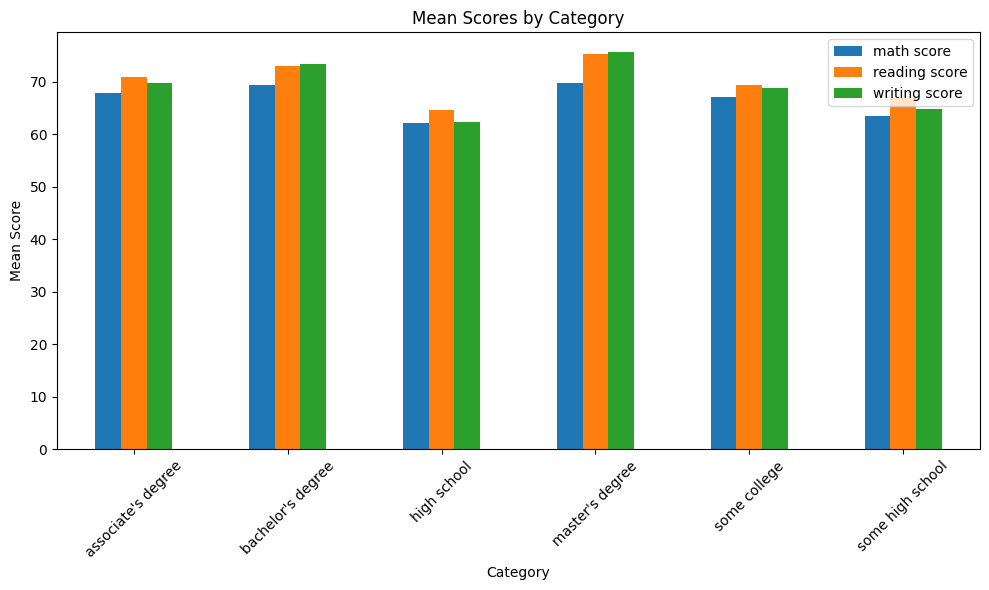

In [27]:
mean_by_category2.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Scores by Category')
plt.xlabel('Category')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

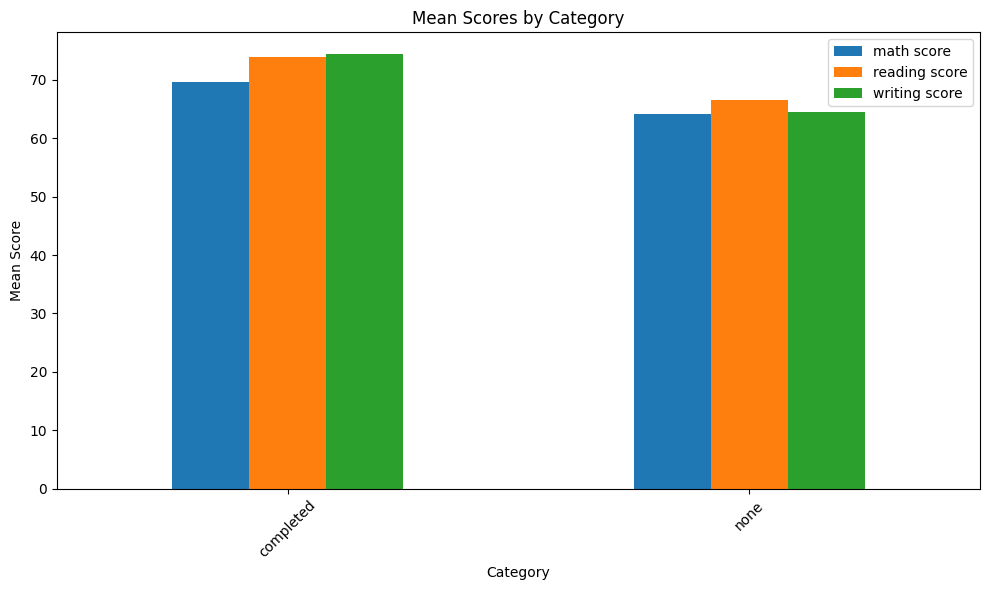

In [28]:
mean_by_category3.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Scores by Category')
plt.xlabel('Category')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Calculate the correlation matrix between math, reading, and writing scores

In [29]:
correlation_matrix = pd_student[['math score', 'reading score', 'writing score']].corr()

# Visualize the correlation matrix using a heatmap

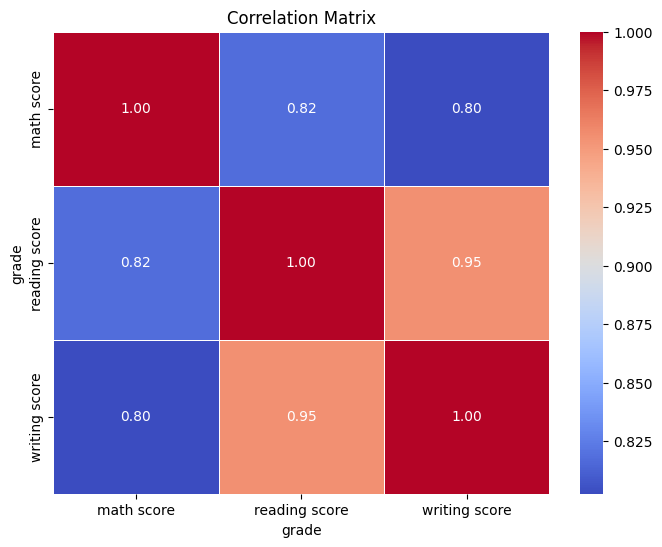

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xlabel('grade')
plt.ylabel('grade')
plt.show()

These commands calculate the correlation matrix between math, reading, and writing scores and visualize it using a heatmap, which allows understanding their relationship. The heatmap is an effective visual representation that shows the strength and direction of correlation between variables, where lighter colors indicate stronger correlation and darker colors indicate weaker correlation.

# Group the students based on a categorical variable

Group Analysis: Dividing students into groups based on a categorical variable (whether they completed a test preparation course or not) and comparing the mean scores in math, reading, and writing between these groups.

In [31]:
grouped_pd_student = pd_student.groupby('test preparation course')

# Calculate the mean scores for each group

In [32]:
mean_scores_by_group = grouped_pd_student[['math score', 'reading score', 'writing score']].mean()

# Visualize the mean scores using a bar plot or box plot

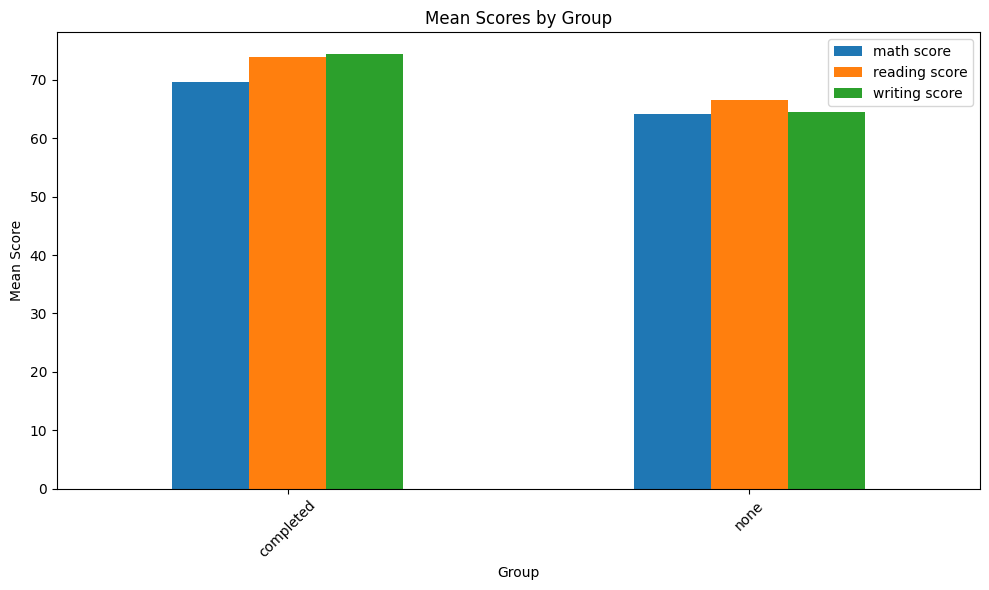

In [33]:
mean_scores_by_group.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Scores by Group')
plt.xlabel('Group')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Regression Analysis

In [34]:
pd_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Select independent and dependent variables

In [35]:
X = pd_student[['parental level of education', 'lunch', 'test preparation course', 'gender', 'race/ethnicity']]
y = pd_student[['math score', 'reading score', 'writing score']]

Data Preprocessing


In [36]:
# Convert categorical variables into dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

Splitting the Data into Training and Testing Sets

In [37]:
# pip install scikit-learn

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

# Build the regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Avaliar o desempenho do modelo nos dados de teste
score = model.score(X_test, y_test)
print("R² Score:", score)


R² Score: 0.1997106803432603




The use of independent variables such as parental level of education, lunch type, test preparation course completion, gender, and race/ethnicity is justified by the fact that these factors can potentially influence students' academic performance. For example, it's reasonable to assume that parental education level may impact learning opportunities and support at home, while lunch type may reflect the student's socioeconomic status.

Transforming categorical variables into dummy variables (one-hot encoding) is necessary so that we can include them in the regression model, which requires numerical variables. This allows us to capture the effect of different categories of these independent variables on students' scores.

Evaluating the performance of the regression model using the coefficient of determination (R²) provides us with a measure of how well the model fits the data. An R² of approximately 0.1997 indicates that the model explains about 19.97% of the observed variability in students' scores in math, reading, and writing based on the independent variables included in the model. This means that the model captures a significant, but still limited, portion of the variation in students' scores.






# Task 2 - Probability (Discrete):

1. What is the probability of rolling exactly two 6s in five rolls of a fair die?

2. The number of industrial injuries on average per working week in a factory is 0.75. 

Assuming that the distribution of injuries follows a Poisson distribution, find the probability 
that in a particular week there will be no more than two accidents.

In [41]:
import scipy.stats as stats
import math

# Probability of getting exactly two 6s in five rolls of a fair die (binomial distribution)
n = 5  # Number of trials
k = 2  # Number of desired successes
p = 1/6  # Probability of success in a single trial (getting a 6)
prob_binomial = stats.binom.pmf(k, n, p)

print("Probability using binomial distribution:", prob_binomial)

# Probability of no more than two accidents in a given week (Poisson distribution)
lambd = 0.75  # Average number of accidents per week
prob_poisson = sum([math.exp(-lambd) * (lambd**i) / math.factorial(i) for i in range(3)])

print("Probability using Poisson distribution:", prob_poisson)

Probability using binomial distribution: 0.16075102880658423
Probability using Poisson distribution: 0.9594945602551861


Therefore, the probability of there being no more than two accidents in a given week is approximately 0.9596.

I used the Poisson distribution to model the number of workplace accidents in a given week, where the average number of accidents is known (0.75 per week). 

The formula of the Poisson distribution allows us to calculate the probability of a certain number of rare events occurring in a fixed interval.

The probability of there being no more than two accidents in a given week, following a Poisson distribution, is approximately 0.9596. This means that there is a high probability (approximately 95.96%) that, in a typical week, the number of workplace accidents does not exceed two, based on the historical average of accidents.

This information is valuable for companies and safety authorities as it provides an understanding of the risk of accidents within a specific time period and can aid in the implementation of preventive measures.


# Task 3 - Probability (Continuous): 

The time a person spends at Dublin Zoo is Normally distributed with a mean of 90 minutes and a 
standard deviation of 10 minutes. 

Using this distribution, answer the following: 

1. If a visitor is selected at random, find the probability that they will spend at most 85 
minutes visiting the zoo. 

2. If a visitor is selected at random, find the probability that they will spend at least 100 
minutes visiting the zoo. 

3. Given that you know that a particular visitor has spent longer than average visiting the Zoo, 
what is the probability that they have spent more than 100 minutes there? 

In [42]:
import scipy.stats as stats

# Parameters of the normal distribution
mean = 90  # Mean
std_deviation = 10  # Standard deviation

# Probability of a visitor spending at most 85 minutes
prob_85 = stats.norm.cdf(85, mean, std_deviation)

# Probability of a visitor spending at least 100 minutes
prob_100 = 1 - stats.norm.cdf(100, mean, std_deviation)

# Probability of a visitor who spent more than the mean spending more than 100 minutes
prob_more_than_100_given_more_than_mean = (1 - stats.norm.cdf(100, mean, std_deviation)) / (1 - stats.norm.cdf(mean, mean, std_deviation))

print("Probability of a visitor spending at most 85 minutes:", prob_85)
print("Probability of a visitor spending at least 100 minutes:", prob_100)
print("Probability of a visitor who spent more than the mean spending more than 100 minutes:", prob_more_than_100_given_more_than_mean)


Probability of a visitor spending at most 85 minutes: 0.3085375387259869
Probability of a visitor spending at least 100 minutes: 0.15865525393145707
Probability of a visitor who spent more than the mean spending more than 100 minutes: 0.31731050786291415


1. Probability of a visitor spending a maximum of 85 minutes at the zoo:
The probability of a visitor spending a maximum of 85 minutes at the zoo is approximately 0.3085. This means that there is about a 30.85% chance that a randomly selected visitor will spend 85 minutes or less at the zoo. This makes sense because we're looking at the area under the normal distribution curve up to the 85-minute point, and that area represents the proportion of visitors who spend less than 85 minutes at the zoo.


2. Probability of a visitor spending at least 100 minutes at the zoo:
The probability of a visitor spending at least 100 minutes at the zoo is approximately 0.1587. This means that there is about a 15.87% chance that a randomly selected visitor will spend 100 minutes or more at the zoo.  We're looking at the area under the normal distribution curve from the 100-minute point to infinity, and this area represents the proportion of visitors who spend 100 minutes or more at the zoo.


3. Probability of a visitor who spent more than 100 minutes at the zoo than average:
The probability that a visitor who has spent more time than average will spend more than 100 minutes at the zoo is approximately 0.3174. This means that since we know that a visitor is already at the right tail end of the distribution (i.e., has spent more time than average), there is about a 31.74% chance that they will spend more than 100 minutes at the zoo. We're comparing the conditional probability of spending more than 100 minutes, given that they've already spent more time than average, versus the likelihood of spending more than 100 minutes overall.
